In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import mlrose_hiive as mlr
from mlrose_hiive import FourPeaks, DiscreteOpt, random_hill_climb
from mlrose_hiive import SARunner, GARunner, RHCRunner
from array import array
import importlib
import numpy as np
import helpers #import the module here, so that it can be reloaded.
importlib.reload(helpers)
import time
import joblib

In [74]:
N = 100
T = 29
max_iters = 5000
numTrials = 5
restarts = [25, 75, 100]
max_attempts = [25, 50, 75, 100, 125, 150]
labels = ['max_attempts', 'restarts', 'run_time', 'best_fitness', 'stopped_at']
results_list=[]
for a in max_attempts:
    for r in restarts:
        eval_func = FourPeaks(t_pct=.1)
        prob = mlr.DiscreteOpt(N, eval_func)
        start_time = time.perf_counter()
        best_state, best_fitness, curve = mlr.random_hill_climb(prob, random_state=1, max_attempts=a, max_iters=max_iters, restarts=r, curve=True)
        run_time = time.perf_counter() - start_time
        stopped_at = len(curve)
        results_list.append([a, r, run_time, best_fitness, stopped_at])
        joblib.dump(pd.DataFrame.from_records(curve), f"four_peaks/rhc/max_attempts{a},restarts{r}_curve.pkl")

df_results = pd.DataFrame.from_records(results_list, columns=labels)
joblib.dump(df_results, "four_peaks/rhc/four_peaks_rhc_results.pkl")

# rhc_best_state, rhc_best_fitness, rhc_curve = mlr.random_hill_climb(prob, max_attempts=30, restarts=1000, max_iters=max_iters, curve=True, random_state=1)
# sa_best_state, sa_best_fitness, sa_curve = mlr.simulated_annealing(prob, max_iters=max_iters, curve=True, random_state=1)

['four_peaks_rhc_results.pkl']

In [75]:
df_results

,max_attempts,restarts,run_time,best_fitness,stopped_at
0,25,25,0.022801,9.0,85
1,25,75,0.051292,10.0,52
2,25,100,0.054333,10.0,52
3,50,25,0.029213,13.0,182
4,50,75,0.088112,16.0,87
5,50,100,0.117952,16.0,87
6,75,25,0.038258,12.0,149
7,75,75,0.115941,15.0,424
8,75,100,0.177585,18.0,404
9,100,25,0.074663,20.0,480


In [76]:
Ns = range(20, 110, 10)
for n in Ns:
    print(n)

20
30
40
50
60
70
80
90
100


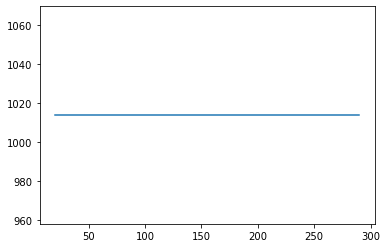

In [78]:
Ns = range(20, 300, 10)
iterations = []
for n in Ns:
    eval_func = FourPeaks(t_pct=.1)
    prob = mlr.DiscreteOpt(N, eval_func)
    best_state, best_fitness, curve = mlr.random_hill_climb(prob, max_attempts=150, max_iters=5000, restarts=100, random_state=12345, curve=True)
    iterations.append(len(curve))
plt.plot(Ns, iterations)

In [80]:
best = joblib.load("four_peaks/rhc/max_attempts150,restarts100_curve.pkl")
len(best)
fitness_vals_best = best[0].values

Text(0.5, 1.0, 'Fitness over Iterations')

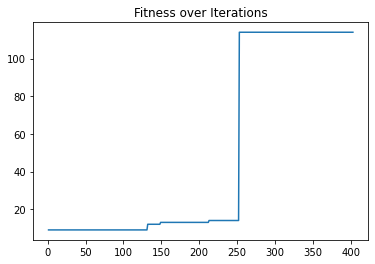

In [81]:
plt.plot(range(1, len(fitness_vals_best) + 1), fitness_vals_best)
plt.title("Fitness over Iterations")

In [83]:
N = 100
T = 29
max_iters = 5000
numTrials = 5
temps = [1, 5, 10, 50, 100]
max_attempts = [25, 50, 75, 100, 125, 150]
labels = ['max_attempts', 'temp', 'run_time', 'best_fitness', 'stopped_at']
results_list=[]
for a in max_attempts:
    for temp in temps:
        eval_func = FourPeaks(t_pct=.1)
        prob = mlr.DiscreteOpt(N, eval_func)
        start_time = time.perf_counter()
        best_state, best_fitness, curve = mlr.simulated_annealing(prob, max_attempts=a, max_iters=max_iters, random_state=1, schedule=mlr.GeomDecay(init_temp=temp), curve=True)
        run_time = time.perf_counter() - start_time
        stopped_at = len(curve)
        results_list.append([a, temp, run_time, best_fitness, stopped_at])
        joblib.dump(pd.DataFrame.from_records(curve), f"four_peaks/sa/max_attempts{a},temp{temp}_curve.pkl")

df_results = pd.DataFrame.from_records(results_list, columns=labels)
joblib.dump(df_results, "four_peaks/sa/four_peaks_sa_results.pkl")

['four_peaks_sa_results.pkl']

In [86]:
df_results.sort_values(by='best_fitness', ascending=False)

,max_attempts,temp,run_time,best_fitness,stopped_at
22,100,100,0.158517,98.0,4992
34,150,100,0.196604,98.0,5000
28,125,100,0.164689,98.0,5000
16,75,100,0.154288,94.0,4720
10,50,100,0.151367,94.0,4695
9,50,50,0.165325,92.0,5000
27,125,50,0.161948,92.0,5000
21,100,50,0.167565,92.0,5000
33,150,50,0.197044,92.0,5000
15,75,50,0.159467,92.0,5000


In [87]:
best = joblib.load("four_peaks/sa/max_attempts100,temp100_curve.pkl")
len(best)
fitness_vals_best = best[0].values

Text(0.5, 1.0, 'Fitness over Iterations')

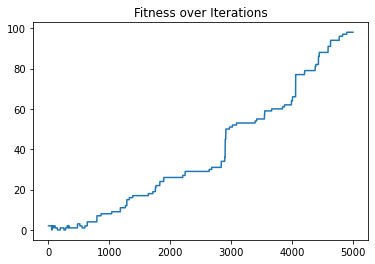

In [88]:
plt.plot(range(1, len(fitness_vals_best) + 1), fitness_vals_best)
plt.title("Fitness over Iterations")

In [92]:
attempts = [10, 100, 1000, 10000]
populations = [100, 200, 300, 400]
mutation_probs = [0.1, 0.2, 0.3]
labels = ['max_attempts', 'population_size', 'mutation_probability', 'run_time', 'best_fitness', 'stopped_at']
results_list=[]
for a in attempts:
    for pop in populations:
        for prob in mutation_probs:
            eval_func = FourPeaks(t_pct=.1)
            problem = mlr.DiscreteOpt(N, eval_func)
            start_time = time.perf_counter()
            (best_state, best_fitness, curve) = mlr.genetic_alg(
                problem,
                pop_size=pop,
                mutation_prob = prob,
                max_attempts=a,
                max_iters=max_iters,
                curve=True,
                random_state=1
            )
            run_time = time.perf_counter() - start_time
            stopped_at = len(curve)
            results_list.append((
                a,
                pop, 
                prob, 
                run_time, 
                best_fitness,
                stopped_at,
            ))
            joblib.dump(pd.DataFrame.from_records(curve), f"four_peaks/ga/max_attempts{a},pop{pop},mut{prob}_curve.pkl")

df_results = pd.DataFrame.from_records(results_list, columns=labels)
joblib.dump(df_results, "four_peaks/ga/four_peaks_ga_results.pkl")

['four_peaks/ga/four_peaks_ma_results.pkl']

In [99]:
ga_results = joblib.load("four_peaks/ga/four_peaks_ga_results.pkl")

In [103]:
ga_results.sort_values(by="best_fitness", ascending=False)
ga_results.loc[ga_results['best_fitness'] == 189].sort_values(by="run_time")

,max_attempts,population_size,mutation_probability,run_time,best_fitness,stopped_at
50,100,100,0.3,3.210806,189.0,375.0
93,100,100,0.3,3.312235,189.0,375.0
49,100,100,0.2,3.803890,189.0,489.0
92,100,100,0.2,3.932306,189.0,489.0
47,10,400,0.3,4.250422,189.0,133.0
...,...,...,...,...,...,...
121,10000,300,0.1,149.916847,189.0,5000.0
123,10000,300,0.3,150.552020,189.0,5000.0
125,10000,400,0.2,176.269113,189.0,5000.0
126,10000,400,0.3,192.577303,189.0,5000.0


Text(0.5, 1.0, 'Fitness over #Iterations')

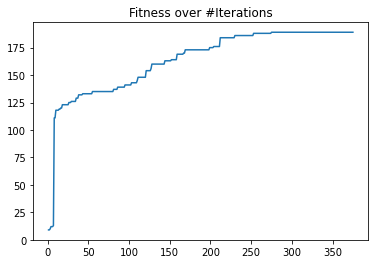

In [241]:
ga_curve = joblib.load("four_peaks/ga/max_attempts100,pop100,mut0.3_curve.pkl")
ga_vals_best = ga_curve[0].values
plt.plot(range(1, len(ga_vals_best) + 1), ga_vals_best)
plt.title("Fitness over #Iterations")

In [244]:
pcts = [0.1, 0.2, 0.4, 0.6, 0.8]
pops = [100, 200, 300]
labels = ['keep_pct', 'population_size', 'run_time', 'best_fitness', 'stopped_at']
results_list = []
for pct in pcts:
    for pop in pops:
        eval_func = FourPeaks(t_pct=.1)
        prob = mlr.DiscreteOpt(N, eval_func)
        start_time = time.perf_counter()
        best_state, best_fitness, curve = mlr.mimic(
            prob,
            pop_size=pop,
            keep_pct=pct,
            max_iters=np.inf, 
            random_state=1, 
            curve=True,
            )
        run_time = time.perf_counter() - start_time
        stopped_at = len(curve)
        results_list.append([pct, pop, run_time, best_fitness, stopped_at])
        joblib.dump(pd.DataFrame.from_records(curve), f"four_peaks/mimic/pct{pct},pop{pop}_curve.pkl")
df_results = pd.DataFrame.from_records(results_list, columns=labels)
joblib.dump(df_results, "four_peaks/mimic/four_peaks_mimic_results.pkl")

['four_peaks/mimic/four_peaks_mimic_results.pkl']

In [246]:
mimic_results = joblib.load("four_peaks/mimic/four_peaks_mimic_results.pkl")

In [247]:
mimic_results.sort_values(by="best_fitness", ascending=False)

,keep_pct,population_size,run_time,best_fitness,stopped_at
5,0.2,300,143.503662,137.0,35
8,0.4,300,103.295903,117.0,25
4,0.2,200,72.487481,116.0,18
7,0.4,200,88.154422,116.0,22
1,0.1,200,63.940104,114.0,16
2,0.1,300,91.016289,27.0,22
10,0.6,200,57.807055,15.0,14
11,0.6,300,80.327130,15.0,19
14,0.8,300,62.164129,14.0,15
3,0.2,100,43.725482,12.0,11


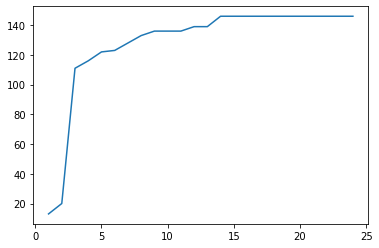

In [110]:
mimic_curve = joblib.load("four_peaks/mimic/pct0.1,pop500_curve.pkl")
mimic_vals_best = mimic_curve[0].values
plt.plot(range(1, len(mimic_vals_best) + 1), mimic_vals_best)

In [284]:
rhc_curve = joblib.load("four_peaks/rhc/max_attempts150,restarts100_curve.pkl")
rhc_curve[0].values

array([  9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,
         9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,
         9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,
         9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,
         9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,
         9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,
         9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,
         9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,
         9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,
         9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,
         9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,
         9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,  12.,
        12.,  12.,  12.,  12.,  12.,  12.,  12.,  12.,  12.,  12.,  12.,
        12.,  12.,  12.,  12.,  12.,  13.,  13.,  1

Text(0.5, 1.0, 'Fitness over Iterations, N=100')

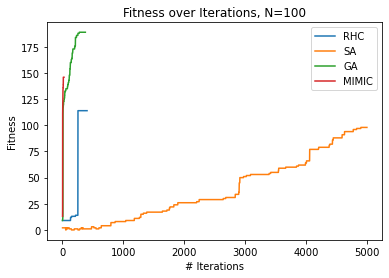

In [295]:
rhc_curve = joblib.load("four_peaks/rhc/max_attempts150,restarts100_curve.pkl")
sa_curve = joblib.load("four_peaks/sa/max_attempts100,temp100_curve.pkl")
ga_curve = joblib.load("four_peaks/ga/max_attempts100,pop100,mut0.3_curve.pkl")
mimic_curve = joblib.load("four_peaks/mimic/pct0.1,pop500_curve.pkl")
all_best_curves = [rhc_curve, sa_curve, ga_curve, mimic_curve]
max_iterations = max([len(c)] for c in all_best_curves)
plt.plot(range(1, len(rhc_curve) + 1), rhc_curve[0].values, label="RHC")
plt.plot(range(1, len(sa_curve) + 1), sa_curve[0].values, label="SA")
plt.plot(range(1, len(ga_curve) + 1), ga_curve[0].values, label="GA")
plt.plot(range(1, len(mimic_curve) + 1), mimic_curve[0].values, label="MIMIC")
plt.legend(loc="best")
plt.xlabel("# Iterations")
plt.ylabel("Fitness")
plt.title("Fitness over Iterations, N=100")

Text(0.5, 1.0, 'Fn Evals over Iterations, N=100')

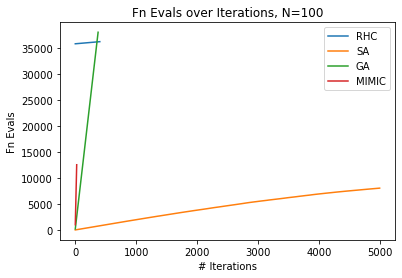

In [3]:
rhc_curve = joblib.load("four_peaks/rhc/max_attempts150,restarts100_curve.pkl")
sa_curve = joblib.load("four_peaks/sa/max_attempts100,temp100_curve.pkl")
ga_curve = joblib.load("four_peaks/ga/max_attempts100,pop100,mut0.3_curve.pkl")
mimic_curve = joblib.load("four_peaks/mimic/pct0.1,pop500_curve.pkl")
all_best_curves = [rhc_curve, sa_curve, ga_curve, mimic_curve]
max_iterations = max([len(c)] for c in all_best_curves)
plt.plot(range(1, len(rhc_curve) + 1), rhc_curve[1].values, label="RHC")
plt.plot(range(1, len(sa_curve) + 1), sa_curve[1].values, label="SA")
plt.plot(range(1, len(ga_curve) + 1), ga_curve[1].values, label="GA")
plt.plot(range(1, len(mimic_curve) + 1), mimic_curve[1].values, label="MIMIC")
plt.legend(loc="best")
plt.xlabel("# Iterations")
plt.ylabel("Fn Evals")
plt.title("Fn Evals over Iterations, N=100")

In [121]:
np.logspace(1, 10, num=10, base=2)

2

In [1]:
Ns = [10, 15, 20, 25,50,100,150,200]
rhc_run_times = []
rhc_best_fitnesses = []
rhc_fitness_per_iteration = []
rhc_fn_evals_per_iteration = []
for n in Ns:
    times=[]
    best_fitnesses=[]
    fitness_per_iteration=[]
    fn_evals_per_iteration=[]
    for i in range(5):
        eval_func = FourPeaks()
        prob = mlr.DiscreteOpt(int(n), eval_func)
        start_time = time.perf_counter()
        best_state, best_fitness, curve = mlr.random_hill_climb(prob, restarts=100, max_iters=1000, curve=True)
        run_time = time.perf_counter() - start_time
        fitness_per_iteration.append([c[0] for c in curve])
        fn_evals_per_iteration.append([c[1] for c in curve])
        times.append(run_time)
        best_fitnesses.append(best_fitness)

    fn_evals_avgs=helpers.avg_nested_lists(fn_evals_per_iteration)
    rhc_fn_evals_per_iteration.append(fn_evals_avgs)
    
    c_avgs=helpers.avg_nested_lists(fitness_per_iteration)
    rhc_fitness_per_iteration.append(c_avgs)
    
    avg_fitness = np.mean(best_fitnesses)
    rhc_best_fitnesses.append(avg_fitness)
    
    avg_run_time = np.mean(times)
    rhc_run_times.append(avg_run_time)

NameError: name 'FourPeaks' is not defined

In [265]:
rhc_best_fitnesses, rhc_run_times, len(rhc_fn_evals_per_iteration)

([18.0, 26.6, 33.8, 33.8, 19.0, 9.4, 8.6, 10.6],
 [0.04304674639715813,
  0.03730939840315841,
  0.029308623593533412,
  0.023021449998486786,
  0.018947571399621665,
  0.017804033210268244,
  0.017604787787422537,
  0.018096516403602436],
 8)

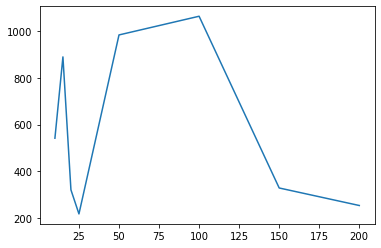

In [267]:
plt.plot(Ns, [rhc[-1] for rhc in rhc_fn_evals_per_iteration])

In [271]:
Ns = [10, 15, 20, 25,50,100,150,200]
sa_run_times = []
sa_best_fitnesses = []
sa_fitness_per_iteration = []
sa_fn_evals_per_iteration = []
for n in Ns:
    times=[]
    best_fitnesses=[]
    fitness_per_iteration=[]
    fn_evals_per_iteration=[]
    for i in range(5):
        eval_func = FourPeaks()
        prob = mlr.DiscreteOpt(int(n), eval_func)
        start_time = time.perf_counter()
        best_state, best_fitness, curve = mlr.simulated_annealing(prob, max_iters=1000, schedule=mlr.GeomDecay(init_temp=100), curve=True)
        run_time = time.perf_counter() - start_time
        fitness_per_iteration.append([c[0] for c in curve])
        fn_evals_per_iteration.append([c[1] for c in curve])
        times.append(run_time)
        best_fitnesses.append(best_fitness)

    fn_evals_avgs=helpers.avg_nested_lists(fn_evals_per_iteration)
    sa_fn_evals_per_iteration.append(fn_evals_avgs)
    
    c_avgs=helpers.avg_nested_lists(fitness_per_iteration)
    sa_fitness_per_iteration.append(c_avgs)    
    
    avg = np.mean(best_fitnesses)
    sa_best_fitnesses.append(avg)
    
    avg_run_time = np.mean(times)
    sa_run_times.append(avg_run_time)

Text(0.5, 1.0, 'Fitness over N')

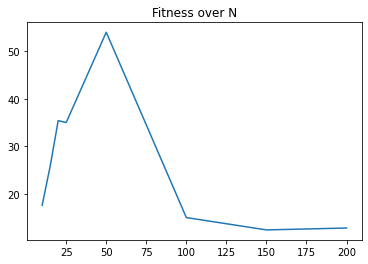

In [272]:
sa_best_fitnesses, sa_run_times
plt.plot(Ns, sa_best_fitnesses)
plt.title("Fitness over N")

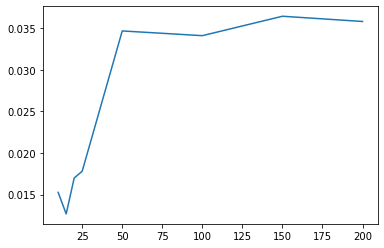

In [275]:
plt.plot(Ns, sa_run_times)

In [256]:
Ns = [10, 15, 20, 25,50,100,150,200]
ga_run_times = []
ga_best_fitnesses = []
ga_fitness_per_iteration = []
ga_fn_evals_per_iteration = []
for n in Ns:
    times=[]
    best_fitnesses=[]
    fitness_per_iteration=[]
    fn_evals_per_iteration=[]
    for i in range(5):
        eval_func = FourPeaks()
        prob = mlr.DiscreteOpt(int(n), eval_func)
        start_time = time.perf_counter()
        (best_state, best_fitness, curve) = mlr.genetic_alg(
            prob,
            pop_size=200,
            mutation_prob = 0.1,
            max_iters=1000,
            curve=True,
        )
        run_time = time.perf_counter() - start_time
        fitness_per_iteration.append([c[0] for c in curve])
        fn_evals_per_iteration.append([c[1] for c in curve])
        times.append(run_time)
        best_fitnesses.append(best_fitness)
        
    fn_evals_avgs=helpers.avg_nested_lists(fn_evals_per_iteration)
    ga_fn_evals_per_iteration.append(fn_evals_avgs)
    
    c_avgs=helpers.avg_nested_lists(fitness_per_iteration)
    ga_fitness_per_iteration.append(c_avgs)
    
    avg = np.mean(best_fitnesses)
    ga_best_fitnesses.append(avg)
        
    avg_run_time = np.mean(times)
    ga_run_times.append(avg_run_time)

In [257]:
ga_best_fitnesses, ga_run_times

([18.0, 27.0, 37.0, 46.0, 78.2, 117.8, 67.4, 36.4],
 [0.14723745840019548,
  0.20273492200649343,
  0.27641695021302437,
  0.3970273667946458,
  0.5981105012004264,
  0.7525956661964301,
  0.8874332637991756,
  0.6934253746003378])

In [276]:
Ns = [10, 15, 20, 25, 50, 100, 150, 200]
mimic_run_times = []
mimic_best_fitnesses = []
for n in Ns:
    best_fitnesses=[]
    for i in range(5):
        eval_func = FourPeaks()
        prob = mlr.DiscreteOpt(int(n), eval_func)
        start_time = time.perf_counter()
        best_state, best_fitness, curve = mlr.mimic(
            prob,
            pop_size=200,
            keep_pct=0.1,
            max_iters=1000, 
            curve=True,
        )
        run_time = time.perf_counter() - start_time
        times.append(run_time)
        best_fitnesses.append(best_fitness)
        
    avg = np.mean(best_fitnesses)
    mimic_best_fitnesses.append(avg)
    
    avg_run_time = np.mean(times)
    mimic_run_times.append(avg_run_time)

In [277]:
mimic_best_fitnesses

[18.0, 26.2, 35.8, 41.0, 57.2, 77.4, 23.6, 20.0]

Text(0.5, 1.0, 'Fitness over N')

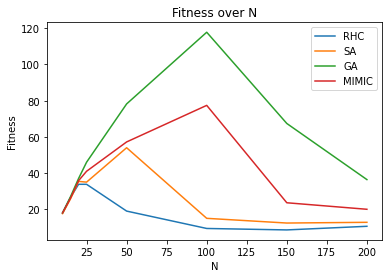

In [292]:
plt.plot(Ns, rhc_best_fitnesses, label="RHC")
plt.plot(Ns, sa_best_fitnesses, label="SA")
plt.plot(Ns, ga_best_fitnesses, label="GA")
plt.plot(Ns, mimic_best_fitnesses, label="MIMIC")
plt.legend(["RHC", "SA", "GA", "MIMIC"])
plt.legend(loc="best")
plt.xlabel("N")
plt.ylabel("Fitness")
plt.title("Fitness over N")

Text(0.5, 1.0, 'Run Time over N')

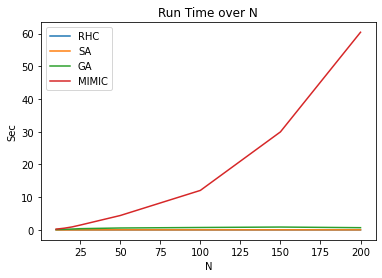

In [293]:
plt.plot(Ns, rhc_run_times, label="RHC")
plt.plot(Ns, sa_run_times, label="SA")
plt.plot(Ns, ga_run_times, label="GA")
plt.plot(Ns, mimic_run_times, label="MIMIC")
plt.ylabel("Sec")
plt.xlabel("N")
plt.legend(["RHC", "SA", "GA", "MIMIC"])
plt.title("Run Time over N")

In [20]:
2 ** np.arange(11)

array([   1,    2,    4,    8,   16,   32,   64,  128,  256,  512, 1024])

In [11]:
eval_func = FourPeaks(t_pct=.1)
problem = mlr.DiscreteOpt(100, eval_func)
rhc = RHCRunner(problem=problem,
                experiment_name="rhc",
                output_directory="four_peaks/rhc_runner",
                seed=12340,
                iteration_list=2 ** np.arange(10),
                max_attempts=500,
                restart_list=[25, 75, 100])
rhc.run()

(      Iteration  Fitness  FEvals         Time  \
 0             0      3.0       0     0.000278   
 1             1      3.0       1     0.007241   
 2             2      3.0       2     0.012021   
 3             4      3.0       4     0.016797   
 4             8      3.0       8     0.021632   
 ...         ...      ...     ...          ...   
 2228         32      1.0   51789  2455.613771   
 2229         64      1.0   51821  2458.378386   
 2230        128      1.0   51885  2463.066853   
 2231        256      4.0   52015  2471.570788   
 2232        512      6.0   52273  2487.343911   
 
                                                   State  Restarts  max_iters  \
 0     [1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, ...        25        512   
 1     [1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, ...        25        512   
 2     [1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, ...        25        512   
 3     [1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, ...        25        

In [13]:
rhc_runner_res = pd.read_csv("four_peaks/rhc_runner/rhc/rhc__rhc__curves_df.csv")

In [15]:
rhc_runner_res.sort_values(by="Fitness", ascending=False)

,Unnamed: 0,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
88063,88063,509,0.195138,28.0,36242.0,100,512,69
49123,49123,482,0.182419,28.0,36215.0,75,512,69
88065,88065,511,0.195940,28.0,36244.0,100,512,69
88066,88066,512,0.196340,28.0,36245.0,100,512,69
88061,88061,507,0.194210,28.0,36240.0,100,512,69
...,...,...,...,...,...,...,...,...
71734,71734,52,0.038671,0.0,19718.0,100,512,38
71733,71733,51,0.038583,0.0,19717.0,100,512,38
71732,71732,50,0.038493,0.0,19716.0,100,512,38
71731,71731,49,0.038409,0.0,19715.0,100,512,38


In [17]:
rhc_runner_run_stats = pd.read_csv("four_peaks/rhc_runner/rhc/rhc__rhc__run_stats_df.csv")

In [21]:
Ns = [10, 15, 20, 25, 50, 100, 150, 200]
eval_func = FourPeaks(t_pct=.1)
for n in Ns:
    problem = mlr.DiscreteOpt(n, eval_func)
    rhc = RHCRunner(problem=problem,
            experiment_name=f"rhc_N{n}",
            output_directory="four_peaks/rhc_runner",
            seed=12345,
            iteration_list=2 ** np.arange(11),
            max_attempts=150,
            restart_list=[100])
    rhc.run()


KeyboardInterrupt: 